In [2]:
import numpy as np
import matplotlib.pyplot as plt
import heisenberg
from scipy.linalg import expm

/Users/jnelson/Q-Theory/heisenberg/time_evolution/integrator.py:29: SyntaxWarning: invalid escape sequence '\d'
  """


Electromagentic field energy is
$$ V(t) = e\textbf{r}\cdot \textbf{E} \cos(\omega t) = \sum_{s,s'=g, e}|s\rangle\langle s|  e\textbf{r}\cdot \textbf{E} \cos(\omega t)|s'\rangle\langle s'|$$
From symmetery we have $\langle s|  e\textbf{r}\cdot \textbf{E}|s\rangle=0$
and hence
$$ V(t) = \langle g|  e\textbf{r}\cdot \textbf{E} |e\rangle \cos(\omega t) |g\rangle\langle e| + \langle e|  e\textbf{r}\cdot \textbf{E} |g\rangle \cos(\omega t) |e\rangle\langle g|$$
Let $\Omega \hbar=\langle e|  e\textbf{r}\cdot \textbf{E} |g\rangle$
then
$$ V(t) = \Omega^* \hbar \cos(\omega t) |g\rangle\langle e| + \Omega \hbar \cos(\omega t) |e\rangle\langle g|$$


$$ H = E_e|e\rangle\langle e| + E_g|g\rangle\langle g| + \Omega^* \hbar \cos(\omega t) |g\rangle\langle e| + \Omega \hbar \cos(\omega t) |e\rangle\langle g|$$

$$ H = E_e|e\rangle\langle e| + E_g|g\rangle\langle g| + \Omega^* \hbar \cos(\omega t) |g\rangle\langle e| + \Omega \hbar \cos(\omega t) |e\rangle\langle g| -(E_e+/E_g) I /2$$

$$ H = (E_e-E_g)/2|e\rangle\langle e| - (E_e-E_g)/2|g\rangle\langle g| + \Omega^* \hbar \cos(\omega t) |g\rangle\langle e| + \Omega \hbar \cos(\omega t) |e\rangle\langle g| $$
Let $\omega_0 \hbar=(E_e-E_g)/2$ then
$$ H = \omega_0 \hbar |e\rangle\langle e| - \omega_0 \hbar|g\rangle\langle g| + \Omega^* \hbar \cos(\omega t) |g\rangle\langle e| + \Omega \hbar \cos(\omega t) |e\rangle\langle g| $$


In [43]:
duration = 10.0
sampling = heisenberg.ConstantSampling(duration, 200)

class Hamiltonian(heisenberg.BaseHamiltonian):
    def __init__(self, omega_0, gamma, omega):
        super().__init__(2)
        self.omega_0 = omega_0
        self.gamma = gamma
        self.omega = omega

        self.h_diag = np.array([[-omega_0, 0.], [0., omega_0]])[None, :]
        self.h_off_const = np.array([[0., np.conj(gamma)], [gamma, 0.]])[None, :]

    def sample(self, t):
        return self.h_diag + self.h_off_const * np.cos(self.omega * t) [:, None, None]


h = Hamiltonian(omega_0=10.0, gamma=0.5, omega=.2)

In [44]:
unitaries = heisenberg.rk4_unitaries(sampling, h)

(200, 2, 2) (1, 2, 2) (200, 2, 2)


In [45]:
initial_state = np.array([[1.0], [0.]])
evo_states = heisenberg.propagate(initial_state, unitaries)

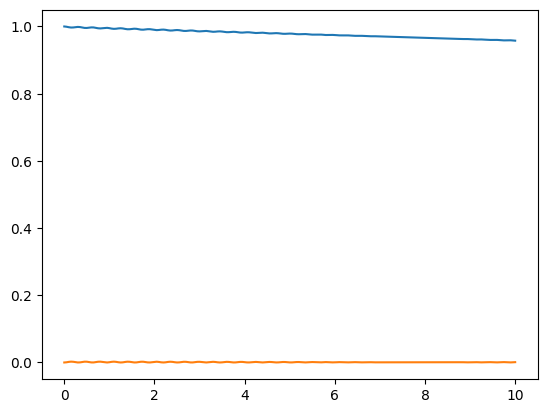

In [46]:
probs = np.real(np.conj(evo_states) * evo_states)
times = sampling.get_grid()

plt.plot(times, probs[:, 0, 0])

plt.plot(times, probs[:, 1, 0])